# Loading Data..

In [8]:
import pandas as pd

speech = pd.read_csv('8.csv')
emotiono = pd.read_csv('emotion.csv')
gaze = pd.read_csv('gaze.csv')


# Analyzing the Speech Dataset


## Descriptive Statistics

The Three most Dominant emotions are:
positive:  0.61
confident:  0.56
hesitant:  0.51


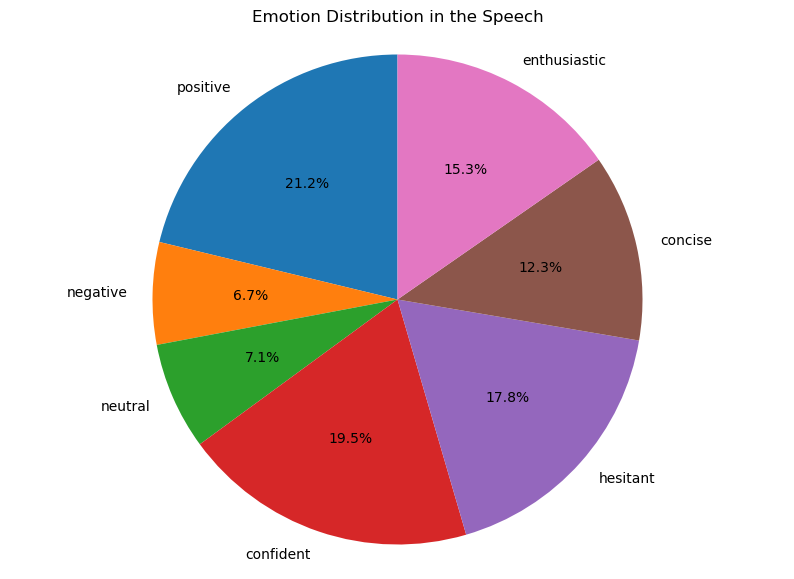

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

emotions = speech.columns[10:-1]
avg = speech[emotions].mean()

top3 = avg.sort_values(ascending = False).head(3)
print('The Three most Dominant emotions are:')
for emo , val in top3.items():
    print(f"{emo}: {val: .2f}")
    

plt.figure(figsize = (10 , 7))
plt.pie(avg , labels = avg.index , autopct ='%1.1f%%' , startangle = 90)
plt.title('Emotion Distribution in the Speech')
plt.axis('equal')
plt.show()

We can see the Three most dominant emotions depicted by the person.

## Trend Analysis

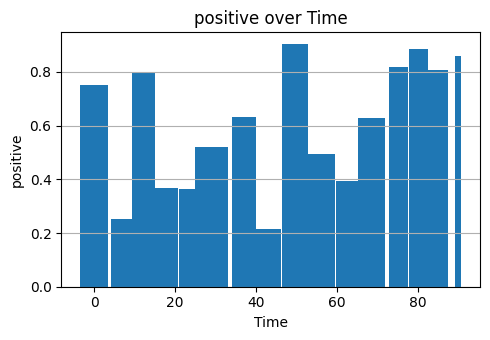

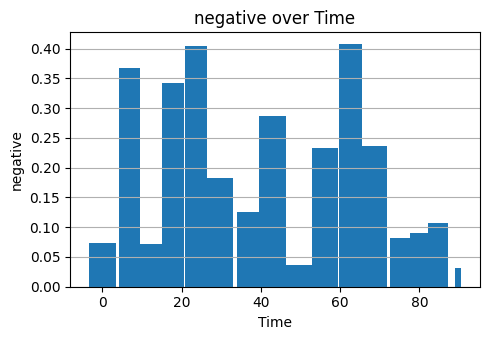

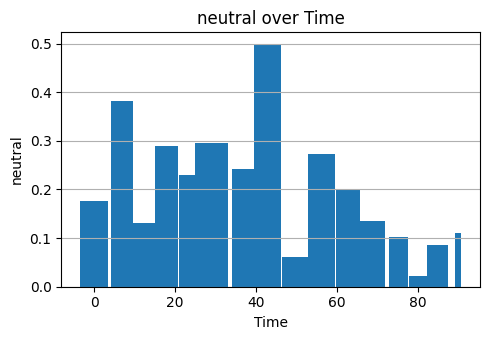

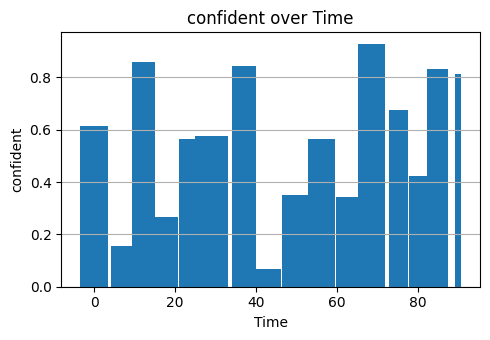

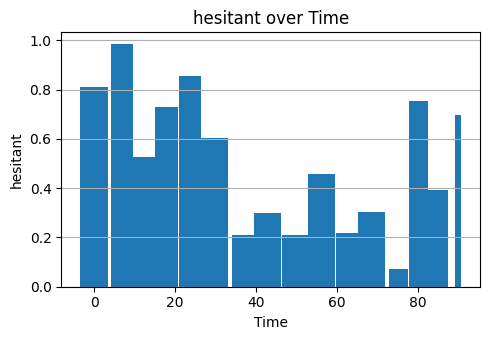

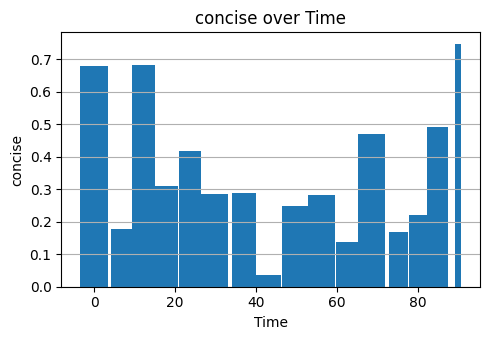

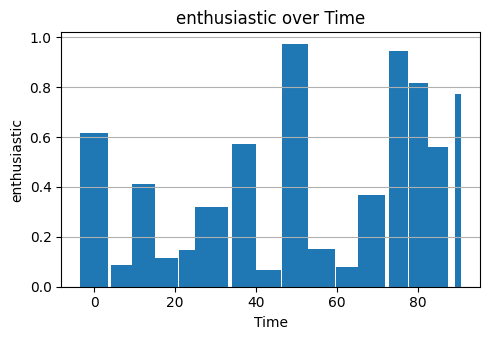

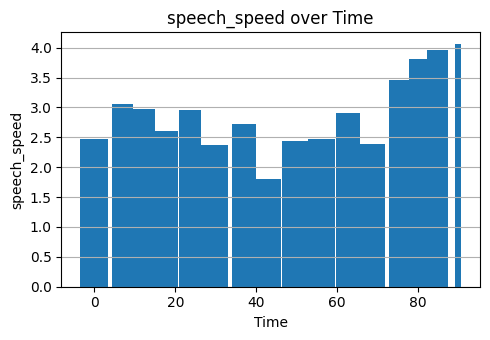

In [3]:

columns = speech.columns[10:]
for column in columns :
    plt.figure(figsize = (5 , 3.5))
    plt.bar(speech['start'] , speech[column] , width = (speech['end'] - speech['start']))
    
    plt.title(f'{column} over Time')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.grid(axis = 'y')
    plt.tight_layout()
    plt.show()

INFERENCES BASED ON THE ABOVE GRAPHS:

1. On an average less positive tone is observed  with an exception where we see peak in positive tone when they talk about their internship in PWC in stationary audit department.

2. The positive values increases as the person moves forward with their speech.

3. Frequent ups and down are observed in the confidence graph with a notable low value when the person talks about their interest in datasets and statistical tools.

4. The hesistant tone decreases as the speech progresses.

5. Low values of conciseness are observed throughout the graph.

6. The person does not sound very enthusiastic except for the case when they talk about their love for numbers and datasets.


## Correlation Analysis

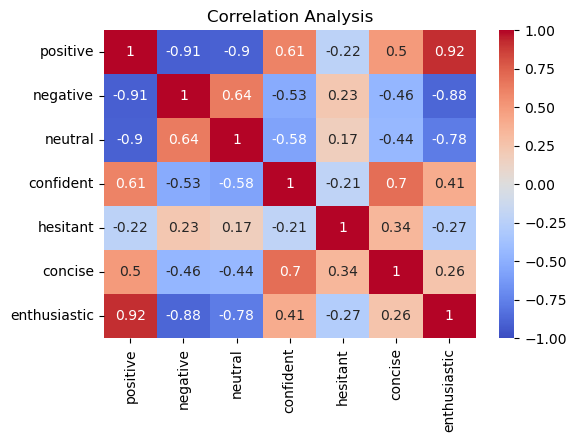

In [4]:
import seaborn as sns
selected = speech.columns[10:-1]
df = speech[selected]
corr = df.corr()

plt.figure(figsize = (6 , 4))
sns.heatmap(corr , annot = True , cmap = 'coolwarm' , vmin = -1 , vmax = 1)
plt.title("Correlation Analysis")
plt.show()

This heat map gives the correlation between emotions where strong correalations are generally (> 0.75 or < -0.75) and these strong correlations can be used to make inferences

# Analyzing the Emotion Dataset

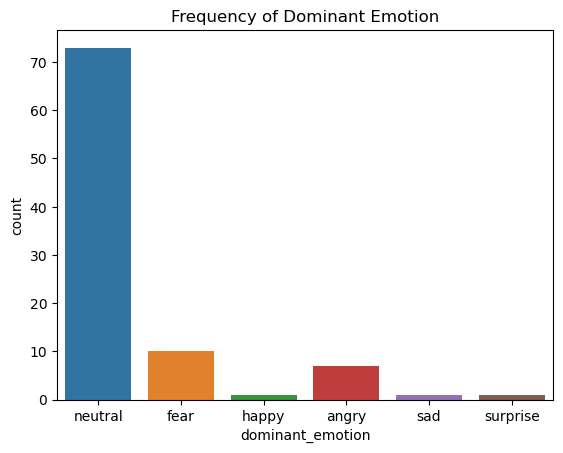

The most dominant emotion is 'neutral' with a count of 73.


In [5]:
sns.countplot(data = emotiono , x = 'dominant_emotion')
plt.title('Frequency of Dominant Emotion')
plt.show()

emotion_counts = emotiono['dominant_emotion'].value_counts()
max_emotion = emotion_counts.idxmax()
max_count = emotion_counts.max()

print(f"The most dominant emotion is '{max_emotion}' with a count of {max_count}.")

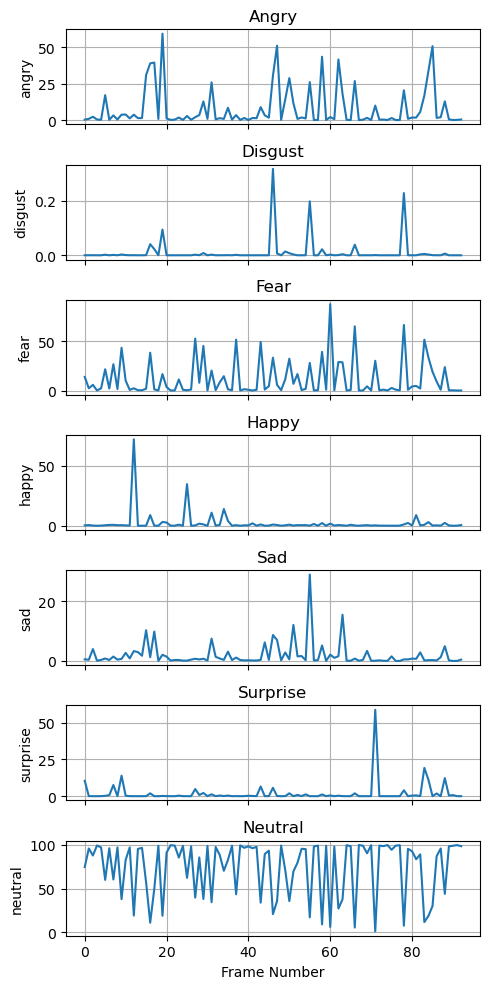

In [6]:
emotion_columns = emotiono.columns[2:-1]
fig, axes = plt.subplots(nrows=len(emotion_columns), figsize=(5 , 10), sharex=True)

x_range = list(range(0, len(emotiono)))

for ax, emotion_col in zip(axes, emotion_columns):
    ax.plot(x_range, emotiono[emotion_col], label=emotion_col)
    ax.set_ylabel(emotion_col)
    ax.grid(True)
    ax.set_title(emotion_col.capitalize())

plt.xlabel('Frame Number')
plt.tight_layout()
plt.show()

From the emotional graphs of the candidate's speech, a predominant pattern in 'neutral' is evident, with only minimal spikes in other emotions. This dominant neutral tone suggests that the candidate often communicates in a factual and objective manner, possibly prioritizing information delivery over emotional expression

## Analyzing the Gaze Dataset


In [7]:
print(f"Percentage of frames with eye contact: {gaze['gaze'].mean() * 100:.2f}%")
print(f"Percentage of frames with blinks: {gaze['blink'].mean() * 100:.2f}%")

Percentage of frames with eye contact: 94.62%
Percentage of frames with blinks: 3.23%


Given that the speaker maintains eye contact in 94.62% of the frames, they exude a commanding presence and demonstrate an almost continuous engagement with the audience. The notably low blink rate of 3.23%, while showcasing intense focus, might also hint at a certain level of restraint or controlled demeanor. This combination suggests a highly confident speaker, but one who might benefit from introducing a touch more naturalness in their presentation

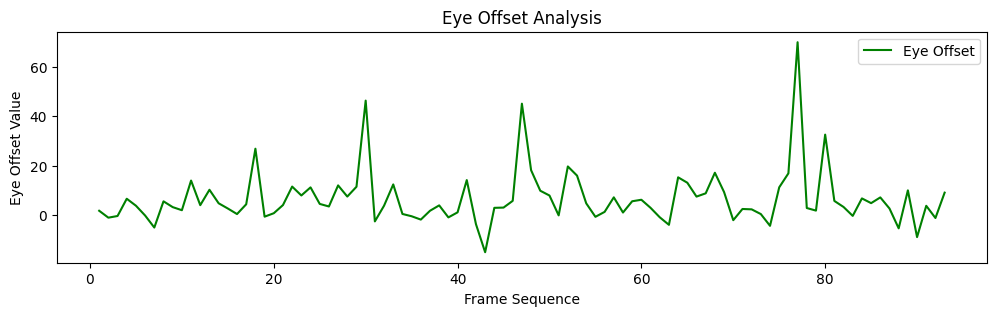

In [8]:
plt.figure(figsize=(12,3))
plt.plot(gaze['image_seq'], gaze['eye_offset'], label='Eye Offset', color='green')
plt.xlabel('Frame Sequence')
plt.ylabel('Eye Offset Value')
plt.title('Eye Offset Analysis')
plt.legend()
plt.show()

The presence of very few offset peaks in the graph indicates that the candidate consistently maintains direct eye contact, exuding confidence and thorough preparation. Such minimal deviations imply a strong grasp of the content and a composed demeanor throughout the presentation.

# Overall Summary

Throughout the speech, Person1 leans more towards a neutral and positive tone, with a notable spike in positivity when discussing their PWC internship. Their confidence fluctuates, especially dipping when delving into datasets and statistical tools. As the speech unfolds, hesitancy reduces. The speaker's generally concise, but their enthusiasm noticeably peaks when discussing their passion for numbers. The dominant 'neutral' tone points to a factual delivery style. Their impressive 94.62% eye contact, paired with a minimal 3.23% blink rate, hints at a very confident yet possibly overly controlled demeanor. The mostly unwavering gaze suggests thorough preparation and focus